In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
project_path = "/content/drive/MyDrive/Hack/Data-20220423T153400Z-001/Data"

In [3]:
import os
os.chdir(project_path)

In [4]:
%matplotlib inline 
import itertools

In [5]:
import numpy as np 

In [6]:
import pandas as pd 

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import seaborn as sns
from matplotlib import rcParams

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn import metrics

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from scipy.stats import zscore

In [14]:
df1 = pd.read_csv("AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Age__and_Race_and_Hispanic_Origin.csv")

In [15]:
df1.head() 

,Data As Of,Start Date,End Date,Jurisdiction of Occurrence,Year,Month,Race and Hispanic Origin Group,Age Group,All Cause,Natural Cause,...,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,07/27/2021,01/01/2019,01/31/2019,United States,2019,1,Hispanic,0-4 years,444,399,...,0,6,0,2,0,47,5,1,0,0
1,07/27/2021,01/01/2019,01/31/2019,United States,2019,1,Hispanic,5-14 years,97,54,...,0,5,1,0,0,0,0,0,0,0
2,07/27/2021,01/01/2019,01/31/2019,United States,2019,1,Hispanic,15-24 years,458,112,...,0,2,4,3,3,9,10,5,0,0
3,07/27/2021,01/01/2019,01/31/2019,United States,2019,1,Hispanic,25-34 years,746,293,...,0,15,5,6,3,14,35,8,0,0
4,07/27/2021,01/01/2019,01/31/2019,United States,2019,1,Hispanic,35-44 years,957,640,...,0,29,10,7,13,19,94,26,0,0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 23 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Data As Of                                                                                1800 non-null   object
 1   Start Date                                                                                1800 non-null   object
 2   End Date                                                                                  1800 non-null   object
 3   Jurisdiction of Occurrence                                                                1800 non-null   object
 4   Year                                                                                      1800 non-null   int64 
 5   Month                                                         

In [17]:
uniqueValues0 = df1['Jurisdiction of Occurrence'].unique()
print('Unique elements in column "Jurisdiction of Occurrence" ')
print(uniqueValues0)
uniqueValues1 = df1['Year'].unique()
print('Unique elements in column "Year" ')
print(uniqueValues1)
uniqueValues2 = df1['Month'].unique()
print('Unique elements in column "Month" ')
print(uniqueValues2)
uniqueValues3 = df1['Race and Hispanic Origin Group'].unique()
print('Unique elements in column "Race and Hispanic Origin Group" ')
print(uniqueValues3)
uniqueValues4 = df1['Age Group'].unique()
print('Unique elements in column "Age Group" ')
print(uniqueValues4)

Unique elements in column "Jurisdiction of Occurrence" 
['United States']
Unique elements in column "Year" 
[2019 2020 2021]
Unique elements in column "Month" 
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique elements in column "Race and Hispanic Origin Group" 
['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White' 'Other']
Unique elements in column "Age Group" 
['0-4 years' '5-14 years' '15-24 years' '25-34 years' '35-44 years'
 '45-54 years' '55-64 years' '65-74 years' '75-84 years'
 '85 years and over']


In [18]:
my_list = df1.columns.values.tolist()
print (my_list)

['Data As Of', 'Start Date', 'End Date', 'Jurisdiction of Occurrence', 'Year', 'Month', 'Race and Hispanic Origin Group', 'Age Group', 'All Cause', 'Natural Cause', 'Septicemia', 'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases', 'Other Diseases of Respiratory System', 'Nephritis, Nephrotic Syndrome, and Nephrosis', 'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', 'Diseases of Heart', 'Cerebrovascular Diseases', 'COVID-19 (Multiple Cause of Death)', 'COVID-19 (Underlying Cause of Death)']


In [19]:
df1_Disease_wise_death = df1[['Natural Cause', 'Septicemia', 'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases', 'Other Diseases of Respiratory System', 'Nephritis, Nephrotic Syndrome, and Nephrosis', 'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', 'Diseases of Heart', 'Cerebrovascular Diseases', 'COVID-19 (Multiple Cause of Death)', 'COVID-19 (Underlying Cause of Death)']].copy()

In [20]:
df1_Disease_wise_death

,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,399,6,4,0,0,6,0,2,0,47,5,1,0,0
1,54,1,20,2,0,5,1,0,0,0,0,0,0,0
2,112,0,21,2,0,2,4,3,3,9,10,5,0,0
3,293,2,62,14,0,15,5,6,3,14,35,8,0,0
4,640,11,165,31,0,29,10,7,13,19,94,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,192,4,33,11,0,2,2,0,4,64,28,6,10,10
1796,311,5,76,14,0,2,11,5,5,51,64,12,11,10
1797,404,3,107,29,2,4,24,3,9,22,100,27,19,16
1798,319,7,67,4,11,4,22,4,9,10,79,23,17,15


In [21]:
data = df1_Disease_wise_death.sum(axis=0)

In [22]:
data

Natural Cause                                                                               7212761
Septicemia                                                                                    97649
Malignant Neoplasms                                                                         1489999
Diabetes Mellitus                                                                            238382
Alzheimer Disease                                                                            313423
Influenza and Pneumonia                                                                      122540
Chronic Lower Respiratory Diseases                                                           375860
Other Diseases of Respiratory System                                                         110750
Nephritis, Nephrotic Syndrome, and Nephrosis                                                 130080
Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified     111773


In [23]:
data_percentage = data / df1['All Cause'].sum(axis=0) * 100

In [24]:
data_percentage

Natural Cause                                                                               91.603877
Septicemia                                                                                   1.240167
Malignant Neoplasms                                                                         18.923362
Diabetes Mellitus                                                                            3.027511
Alzheimer Disease                                                                            3.980551
Influenza and Pneumonia                                                                      1.556289
Chronic Lower Respiratory Diseases                                                           4.773516
Other Diseases of Respiratory System                                                         1.406553
Nephritis, Nephrotic Syndrome, and Nephrosis                                                 1.652049
Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Clas

([<matplotlib.patches.Wedge at 0x7fa06c127b50>,
 [Text(-0.12952481343643574, 1.0923476199014015, 'Natural Cause'),
  Text(-1.0633362607604686, -0.28163095808512434, 'Septicemia'),
  Text(-0.8884099080512058, -0.6486353638805459, 'Malignant Neoplasms'),
  Text(-0.5612595240135586, -0.9460379203309315, 'Diabetes Mellitus'),
  Text(-0.4346917778605191, -1.0104667526744566, 'Alzheimer Disease'),
  Text(-0.32946180988618984, -1.049502222878311, 'Influenza and Pneumonia'),
  Text(-0.20502500663343073, -1.0807241769549536, 'Chronic Lower Respiratory Diseases'),
  Text(-0.08082799937265231, -1.0970263599920536, 'Other Diseases of Respiratory System'),
  Text(-0.018872376778734108, -1.0998380941732842, 'Nephritis, Nephrotic Syndrome, and Nephrosis'),
  Text(0.043406516612299606, -1.0991432455852086, 'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified'),
  Text(0.48820315050897123, -0.9857269824008649, 'Diseases of Heart'),
  Text(0.8915569752772824, -0.6443

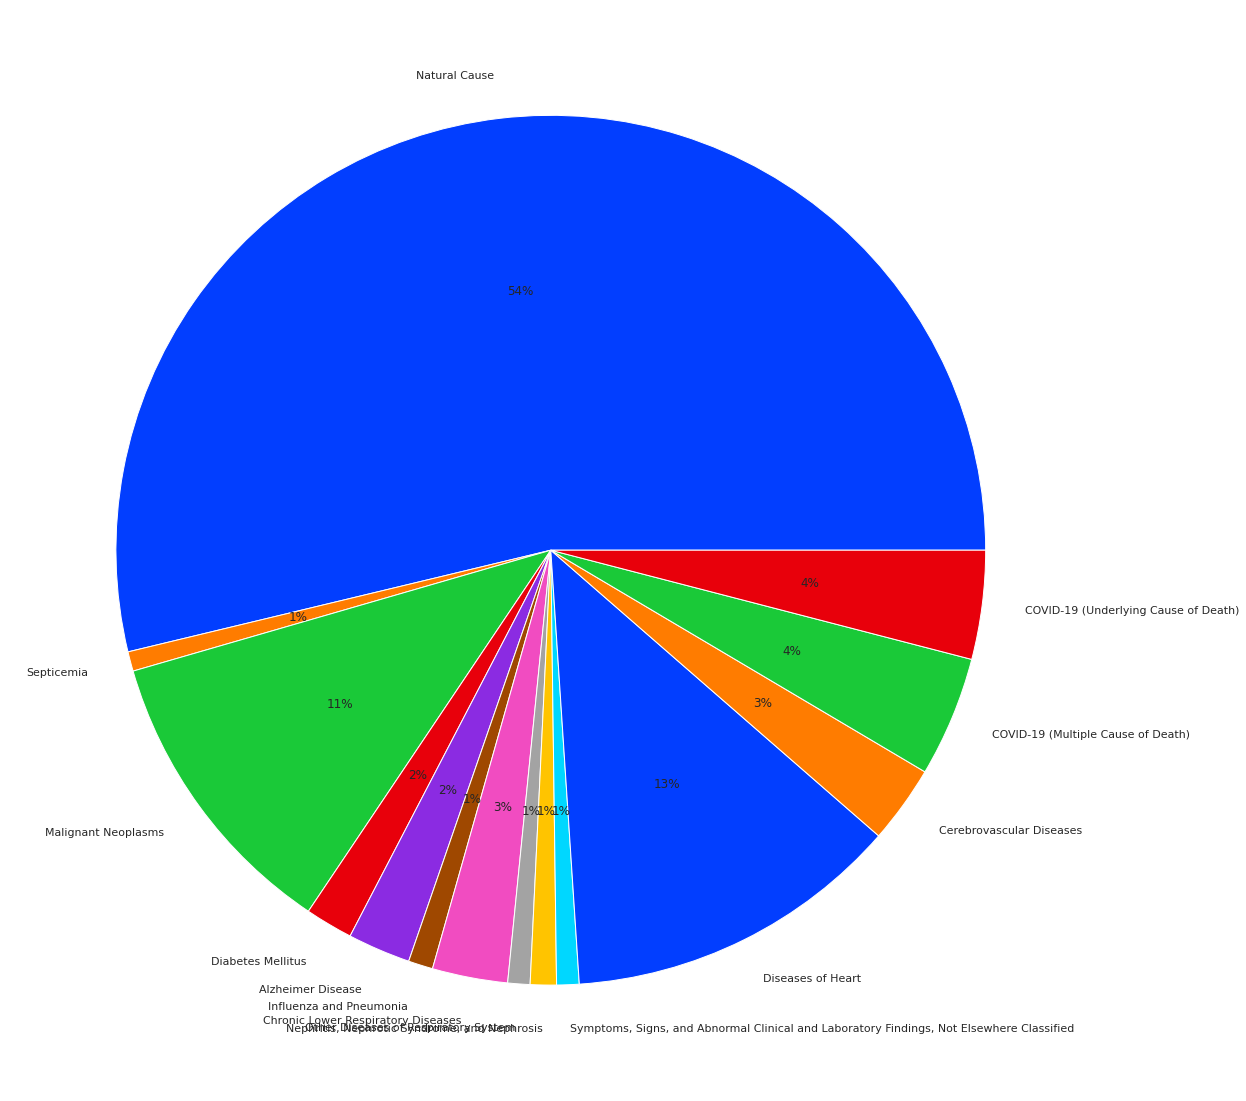

In [25]:
keys = ['Natural Cause', 'Septicemia', 'Malignant Neoplasms', 'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia', 'Chronic Lower Respiratory Diseases', 'Other Diseases of Respiratory System', 'Nephritis, Nephrotic Syndrome, and Nephrosis', 'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified', 'Diseases of Heart', 'Cerebrovascular Diseases', 'COVID-19 (Multiple Cause of Death)', 'COVID-19 (Underlying Cause of Death)']
sns.set(rc={'figure.figsize':(20,20)})
palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


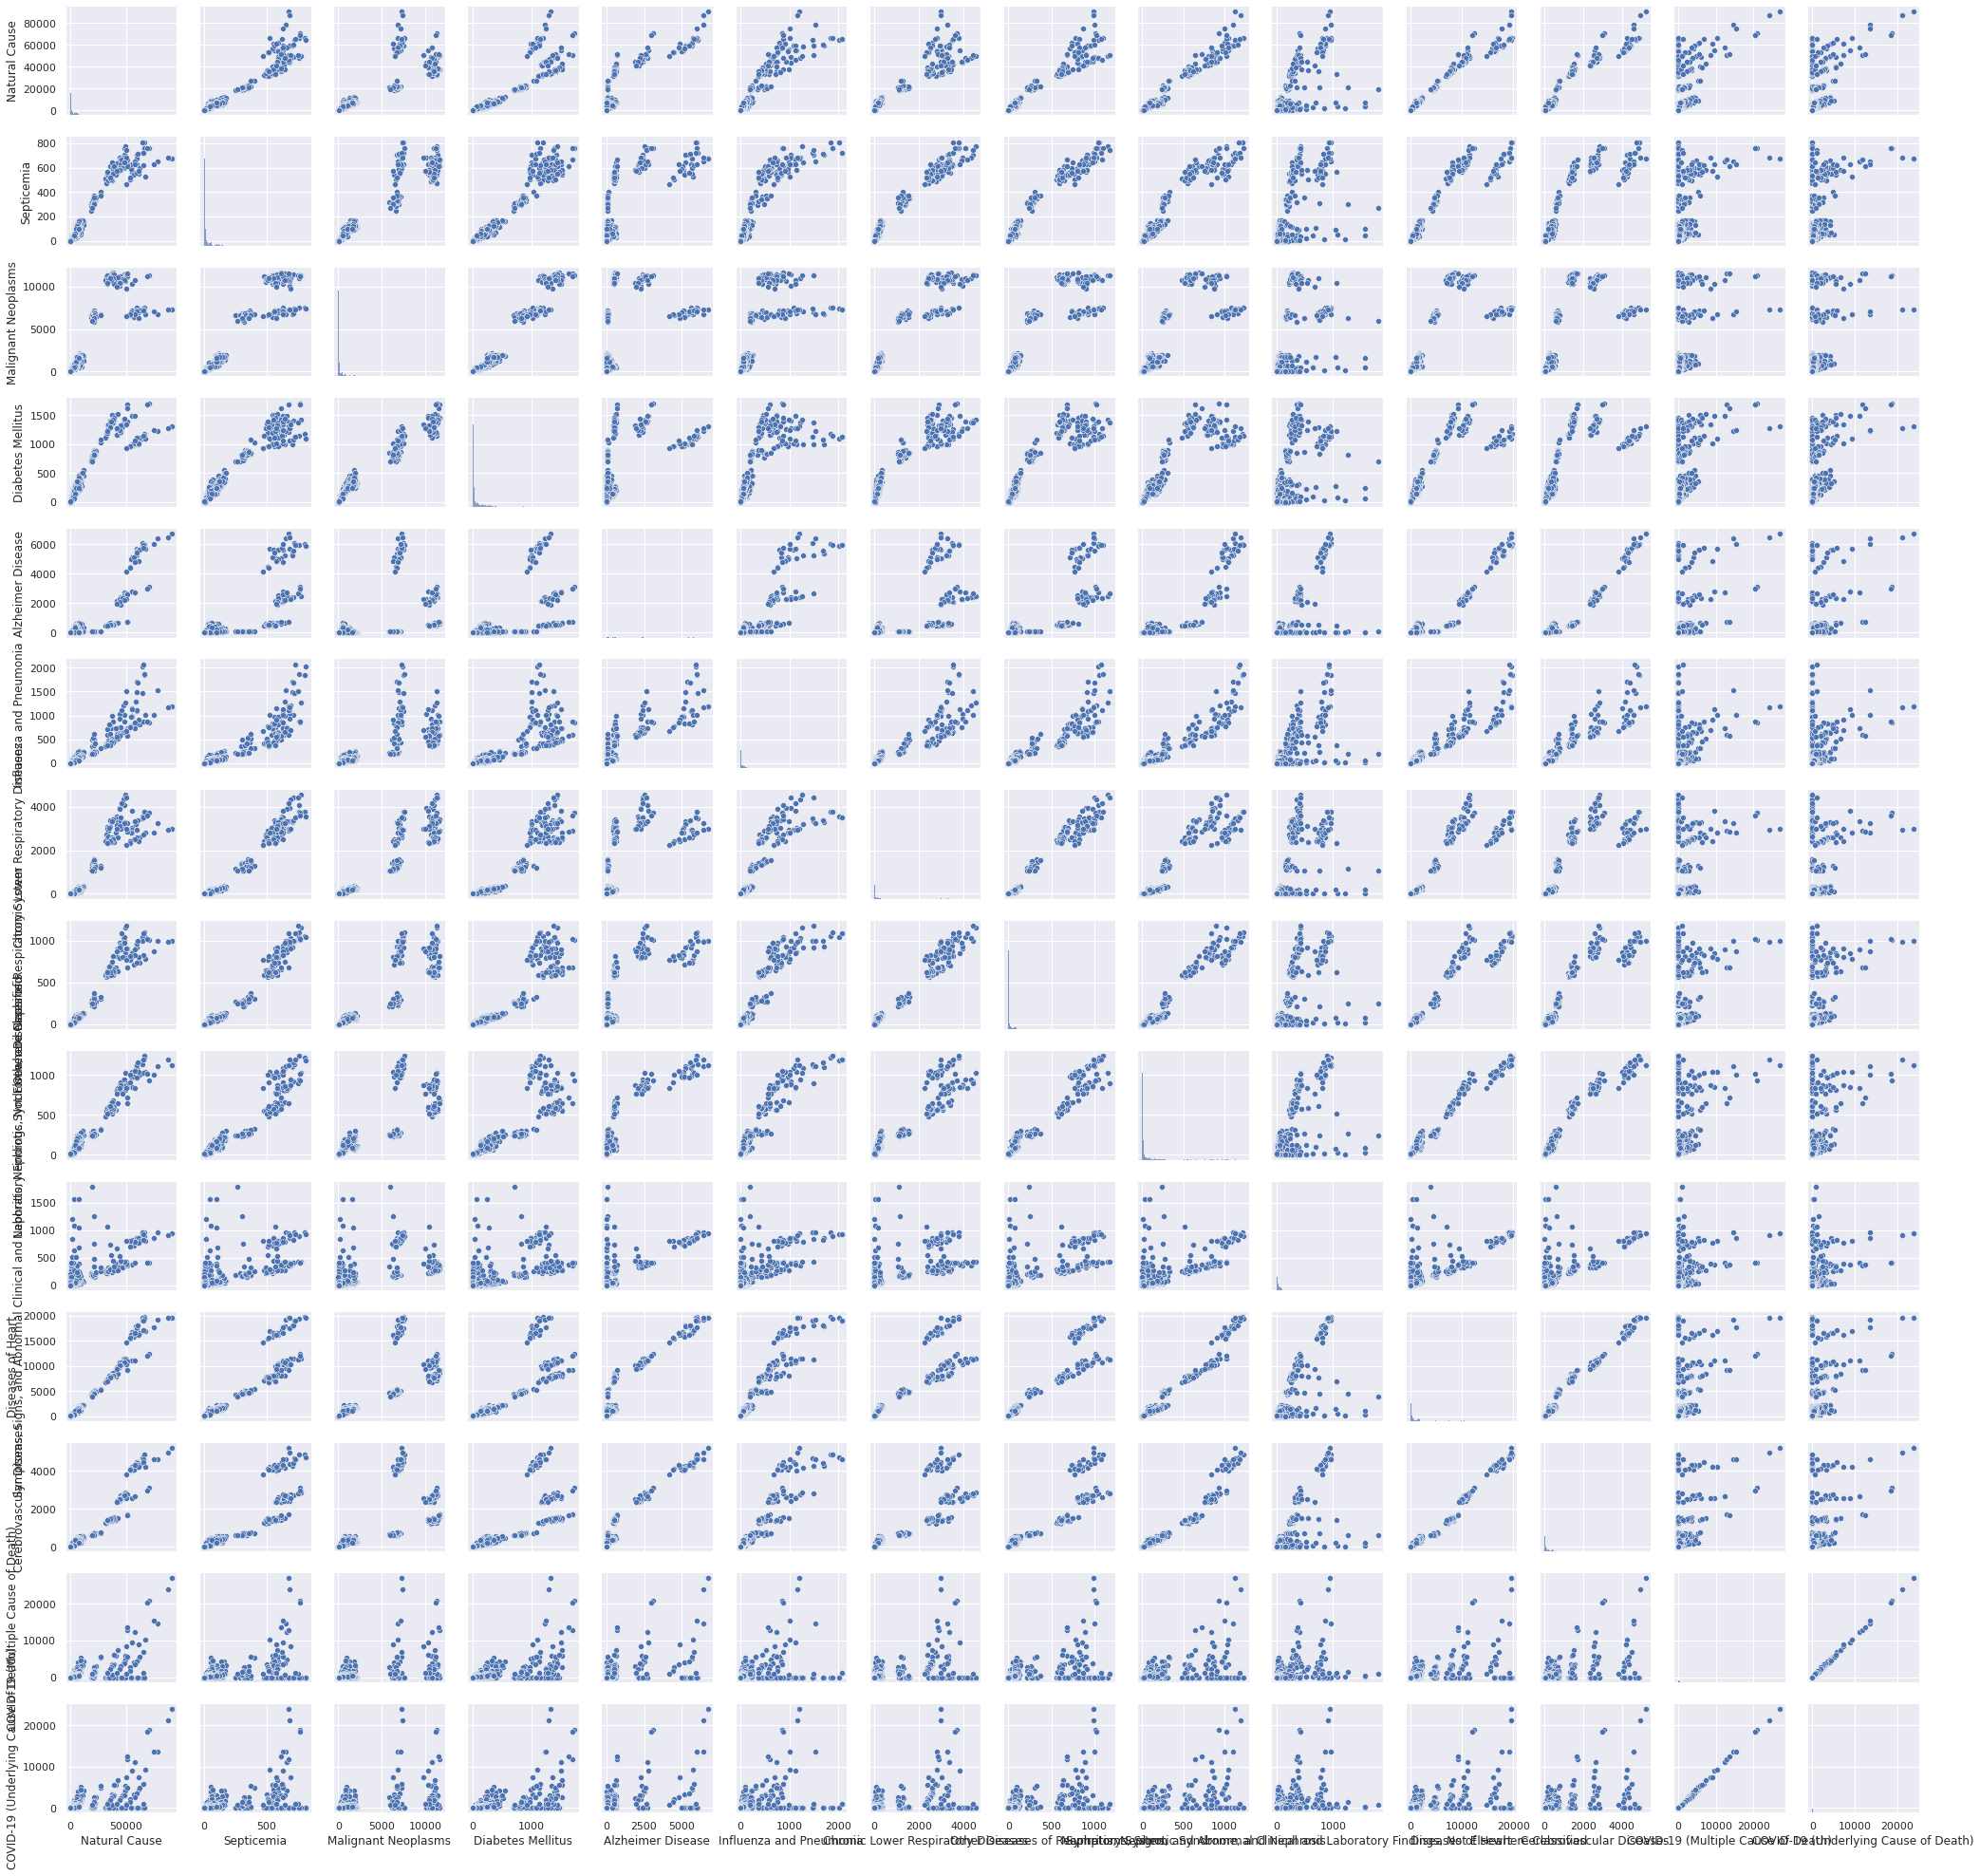

In [26]:
sns.pairplot(df1_Disease_wise_death)
plt.show()

### So we can see that Covid Caused deaths by multicauses & as main cause are strongly correlated
### Also "Disease of Heart" & " cardiovascular deaths are co-related

## Since we are interested in understanding Knowing more about "renal diseases-'Nephritis, Nephrotic Syndrome, and Nephrosis' and its relation to important diseases, so we will select
*Natural Cause
*Nephritis, nephrotic syndrome & Neprosis
* Covid-19 (Underlying Cause of death) only in our dataframe of interest


In [27]:
df_death = df1[['Year', 'Month', 'Race and Hispanic Origin Group', 'Age Group', 'All Cause', 'Natural Cause',  'Nephritis, Nephrotic Syndrome, and Nephrosis',  'COVID-19 (Underlying Cause of Death)']].copy()

In [28]:
df_death

,Year,Month,Race and Hispanic Origin Group,Age Group,All Cause,Natural Cause,"Nephritis, Nephrotic Syndrome, and Nephrosis",COVID-19 (Underlying Cause of Death)
0,2019,1,Hispanic,0-4 years,444,399,0,0
1,2019,1,Hispanic,5-14 years,97,54,0,0
2,2019,1,Hispanic,15-24 years,458,112,3,0
3,2019,1,Hispanic,25-34 years,746,293,3,0
4,2019,1,Hispanic,35-44 years,957,640,13,0
...,...,...,...,...,...,...,...,...
1795,2021,6,Other,45-54 years,218,192,4,10
1796,2021,6,Other,55-64 years,343,311,5,10
1797,2021,6,Other,65-74 years,417,404,9,16
1798,2021,6,Other,75-84 years,328,319,9,15


In [29]:
death = df_death[['All Cause', 'Natural Cause',  'Nephritis, Nephrotic Syndrome, and Nephrosis',  'COVID-19 (Underlying Cause of Death)']]

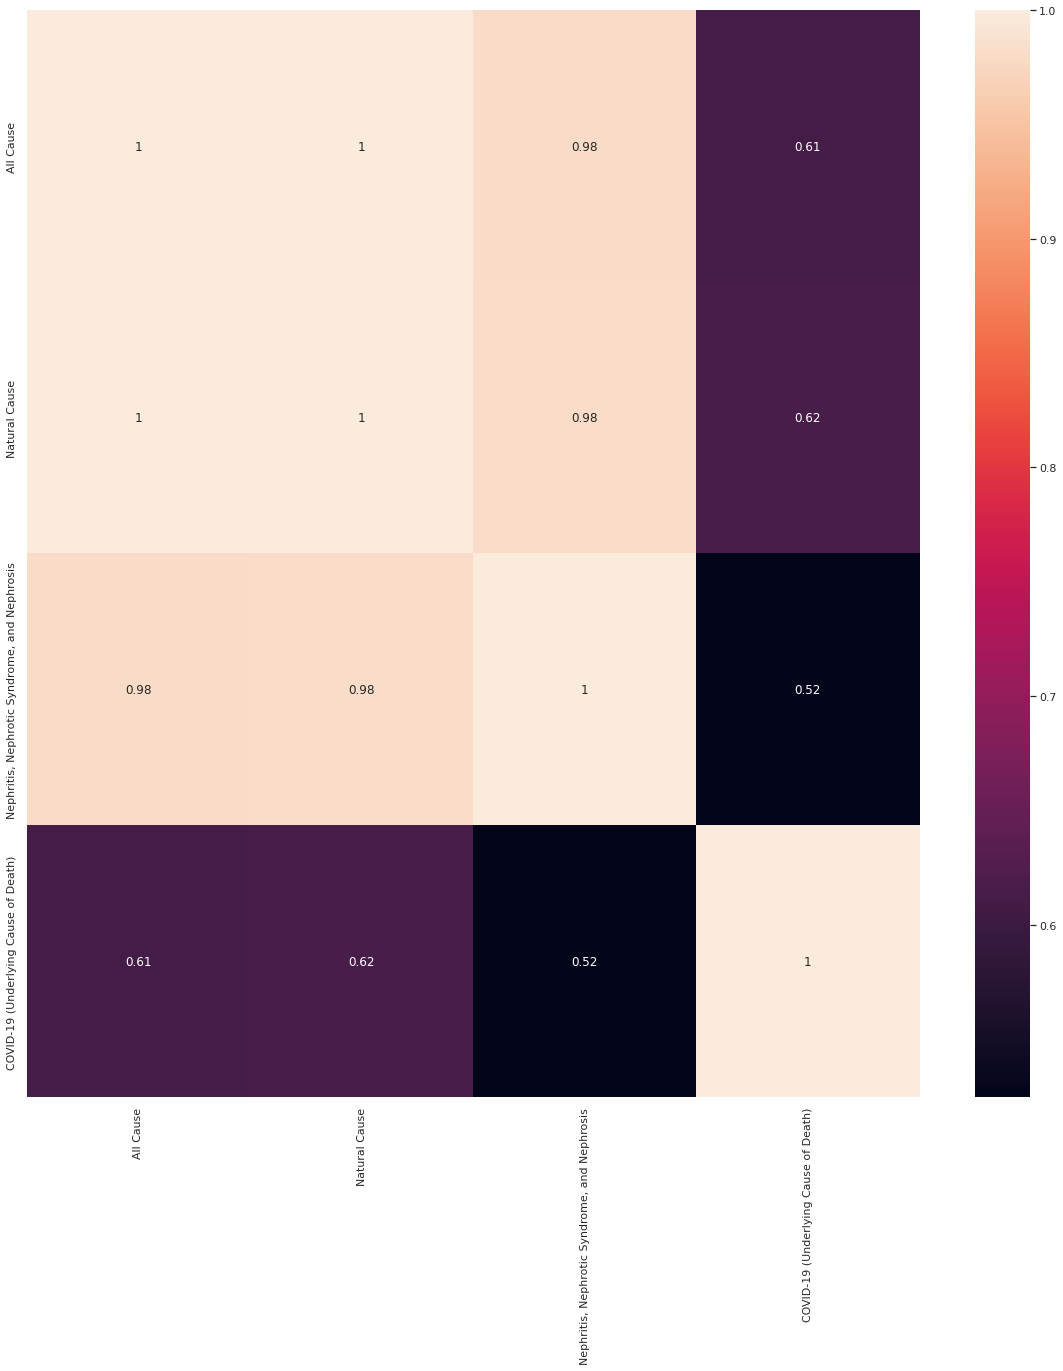

In [30]:
sns.heatmap(death.corr(),annot = True)

## We can see that 

## This dataset includes Month wise Provisional Counts of deaths due to Various Medical Reasons 

In [31]:
df_death['Year'].astype(str).astype(int)

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1795    2021
1796    2021
1797    2021
1798    2021
1799    2021
Name: Year, Length: 1800, dtype: int64

In [32]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Year                                          1800 non-null   int64 
 1   Month                                         1800 non-null   int64 
 2   Race and Hispanic Origin Group                1800 non-null   object
 3   Age Group                                     1800 non-null   object
 4   All Cause                                     1800 non-null   int64 
 5   Natural Cause                                 1800 non-null   int64 
 6   Nephritis, Nephrotic Syndrome, and Nephrosis  1800 non-null   int64 
 7   COVID-19 (Underlying Cause of Death)          1800 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 112.6+ KB


In [34]:
df_death['Year'].replace([2019,2020,2021],[0,12,24],inplace=True)


In [35]:
df_death["Period"] = df_death["Year"] + df_death["Month"]

In [36]:
df_death

,Year,Month,Race and Hispanic Origin Group,Age Group,All Cause,Natural Cause,"Nephritis, Nephrotic Syndrome, and Nephrosis",COVID-19 (Underlying Cause of Death),Period
0,0,1,Hispanic,0-4 years,444,399,0,0,1
1,0,1,Hispanic,5-14 years,97,54,0,0,1
2,0,1,Hispanic,15-24 years,458,112,3,0,1
3,0,1,Hispanic,25-34 years,746,293,3,0,1
4,0,1,Hispanic,35-44 years,957,640,13,0,1
...,...,...,...,...,...,...,...,...,...
1795,24,6,Other,45-54 years,218,192,4,10,30
1796,24,6,Other,55-64 years,343,311,5,10,30
1797,24,6,Other,65-74 years,417,404,9,16,30
1798,24,6,Other,75-84 years,328,319,9,15,30


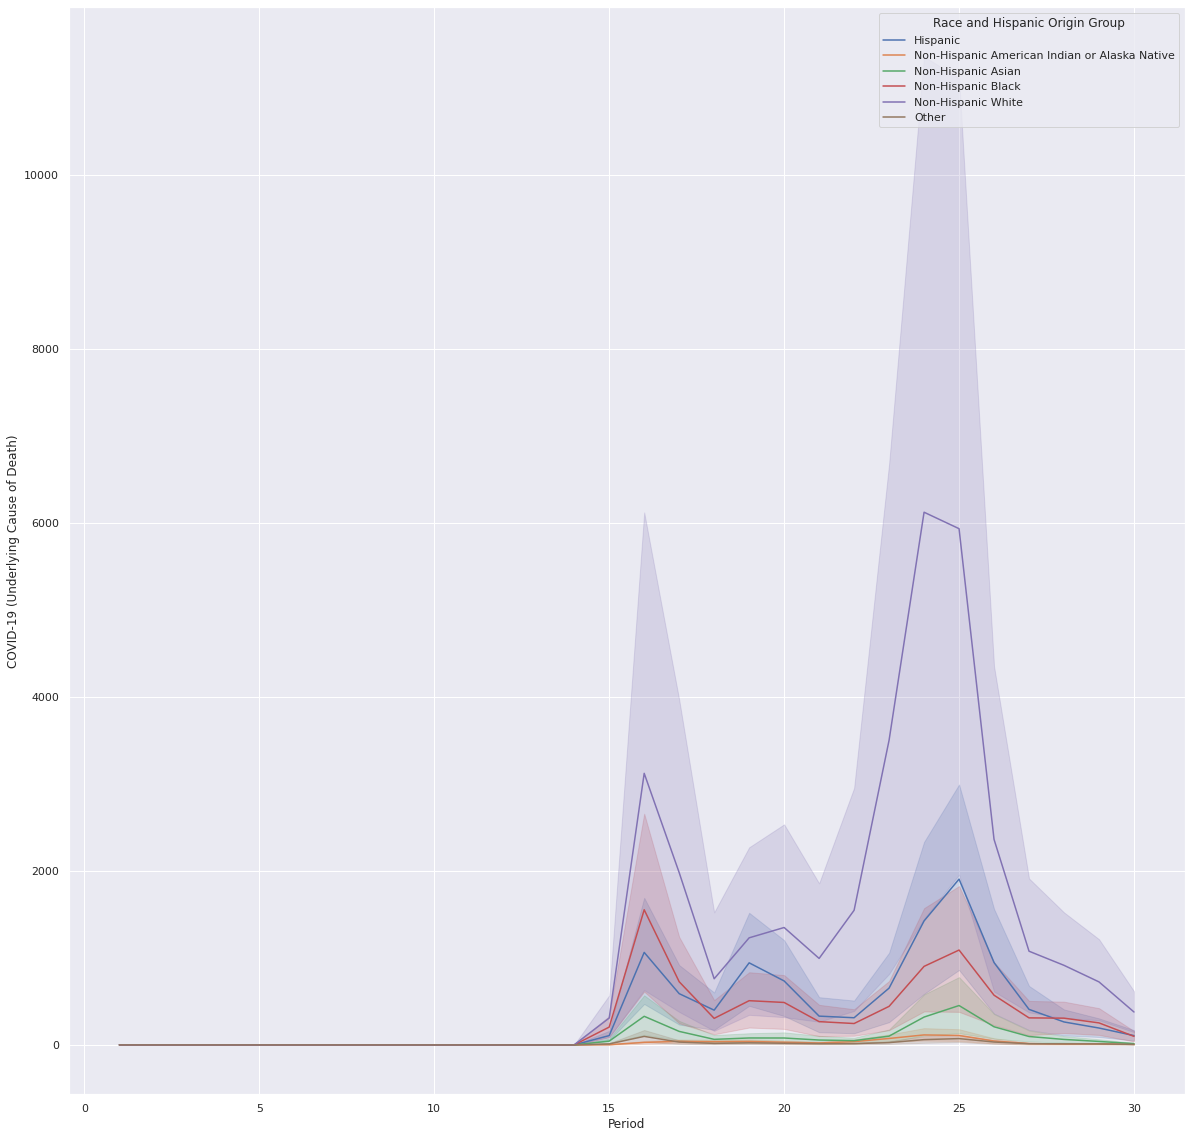

In [39]:
sns.lineplot(data=df_death, x="Period", y="COVID-19 (Underlying Cause of Death)", hue='Race and Hispanic Origin Group')

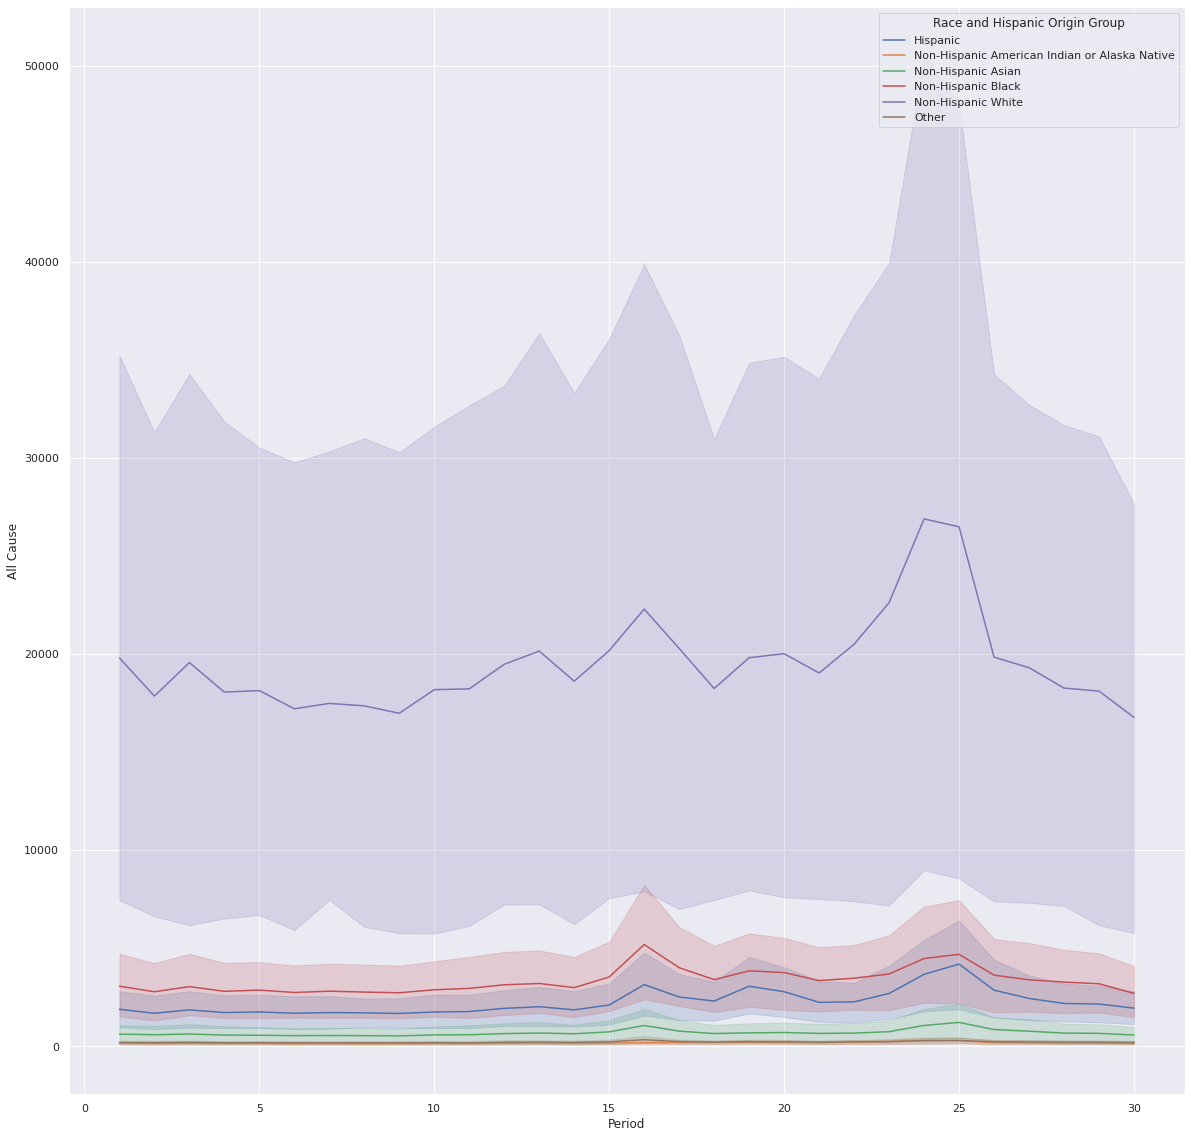

In [40]:
sns.lineplot(data=df_death, x="Period", y="All Cause", hue='Race and Hispanic Origin Group')

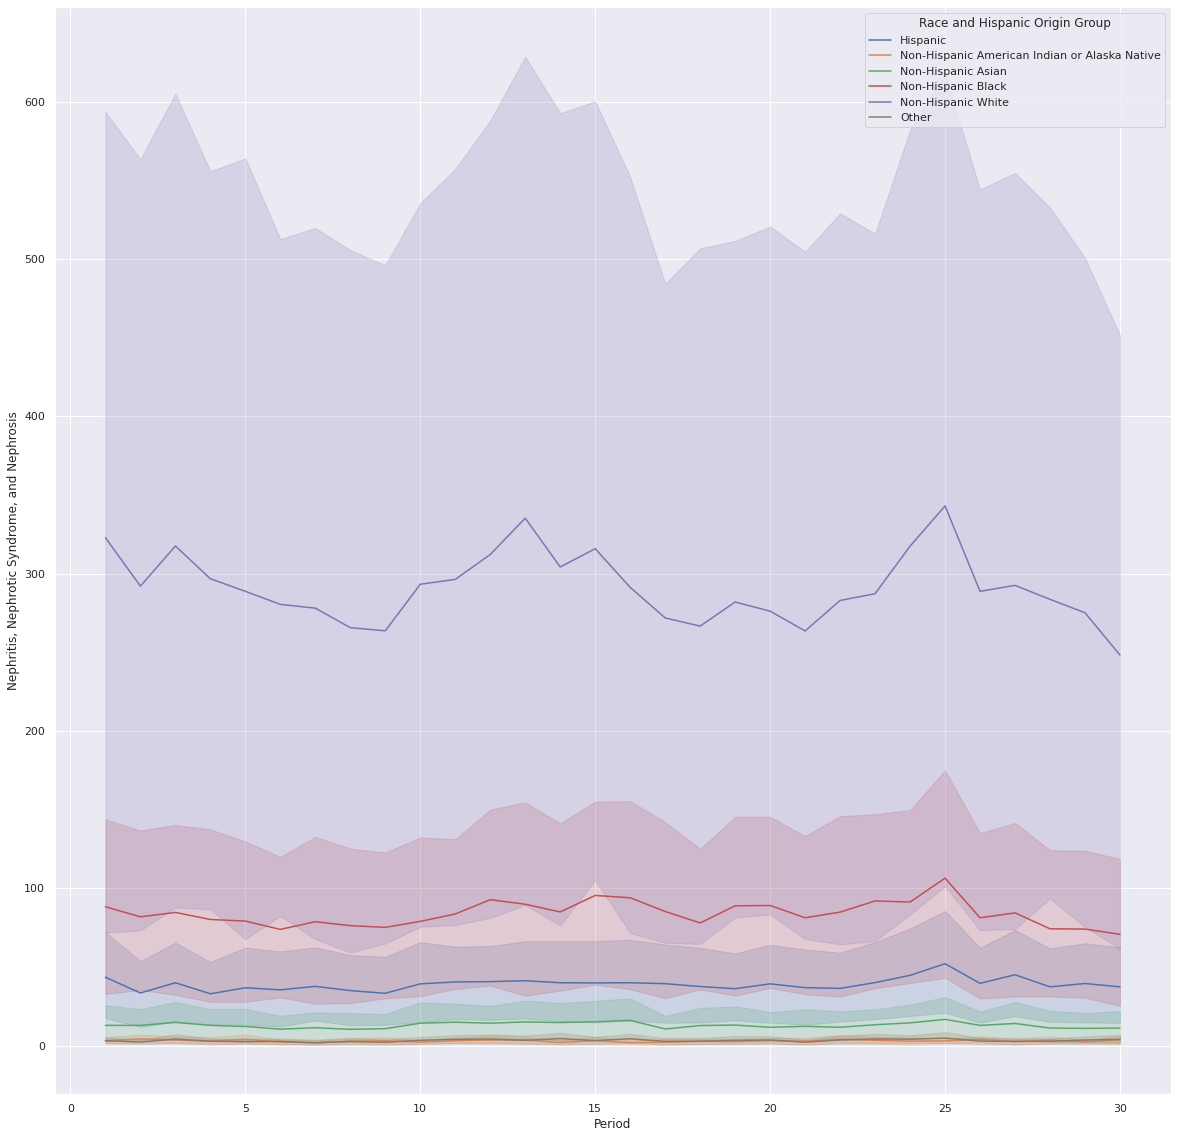

In [41]:
sns.lineplot(data=df_death, x="Period", y="Nephritis, Nephrotic Syndrome, and Nephrosis", hue='Race and Hispanic Origin Group')

AxesSubplot(0.125,0.125;0.775x0.755)


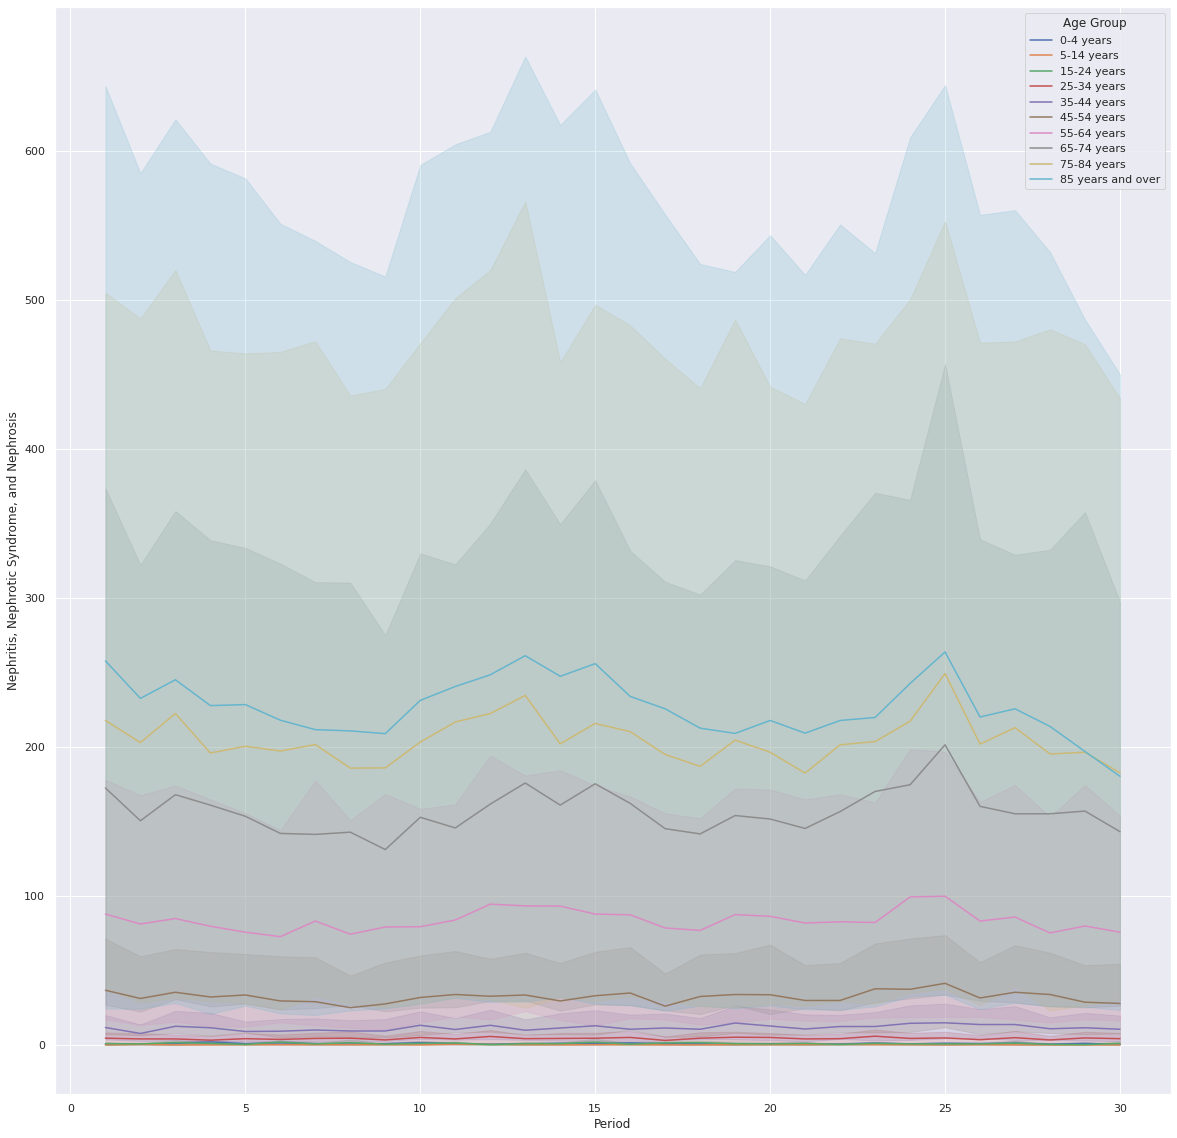

In [71]:
plot1 = sns.lineplot(data=df_death, x="Period", y="Nephritis, Nephrotic Syndrome, and Nephrosis", hue='Age Group')
print(plot1)

In [ ]:
sns.lineplot(data=df_death, x="Period", y="Nephritis, Nephrotic Syndrome, and Nephrosis", hue='Age Group')
sns.relplot(
    data=df_death, x="Period", y="Nephritis, Nephrotic Syndrome, and Nephrosis",
    col="region", hue="Age Group", style="event",
    kind="line"
)

In [55]:
df_vacc = pd.read_csv("COVID-19_Vaccination_Demographics_in_the_United_States_National.csv")

In [56]:
df_vacc

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
0,04/19/2022,Race_eth_NHBlack,19654556,10.3,7.7,17188655,47.7,41.7,10.1,7.8,44.4,8.3,10.1,10.4,7355683,85173
1,04/19/2022,Ages_40-49_yrs,35248342,13.7,13.7,30315304,86.4,74.3,13.8,13.8,43.4,13.2,14.4,8.1,13165914,74011
2,04/19/2022,Race_eth_NHWhite,105162212,55.0,40.9,95455220,53.3,48.4,56.1,43.6,59.0,61.3,56.6,50.8,54513075,415483
3,04/19/2022,Ages_75+_yrs,22848828,8.9,8.9,19812002,95.0,86.5,9.0,9.0,70.4,14.0,9.4,18.3,13949785,166743
4,04/19/2022,Sex_Female,132863723,52.2,51.7,113969237,78.8,67.6,52.4,52.0,49.5,54.8,52.5,54.5,54435642,496767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,12/13/2020,Ages_65-74_yrs,4958,18.9,18.9,1427,0.0,0.0,22.2,22.2,0.0,0.0,22.2,0.0,0,0
14786,12/13/2020,Race_eth_NHNHOPI,39,0.2,0.1,12,0.0,0.0,0.2,0.2,0.0,0.0,0.2,0.0,0,0
14787,12/13/2020,Race_eth_NHBlack,1556,7.8,5.9,394,0.0,0.0,8.1,6.1,0.0,0.0,8.1,0.0,0,0
14788,12/13/2020,Sex_unknown,272,1.0,1.0,87,NaN,NaN,1.4,1.4,0.0,0.0,1.4,0.0,0,0


## This dataset decribes cumulative data of vaccinations from 13th December 2020   to 19th April 2022
#### We need to know Vaccination distribution currently done 
#### Hence we have selected current last dates dataset for comparing deficiency in provision to different races

In [69]:
df_vacc1 = df_vacc[(df_vacc['Date'] == '04/19/2022')]

In [70]:
df_vacc1

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
0,04/19/2022,Race_eth_NHBlack,19654556,10.3,7.7,17188655,47.7,41.7,10.1,7.8,44.4,8.3,10.1,10.4,7355683,85173
1,04/19/2022,Ages_40-49_yrs,35248342,13.7,13.7,30315304,86.4,74.3,13.8,13.8,43.4,13.2,14.4,8.1,13165914,74011
2,04/19/2022,Race_eth_NHWhite,105162212,55.0,40.9,95455220,53.3,48.4,56.1,43.6,59.0,61.3,56.6,50.8,54513075,415483
3,04/19/2022,Ages_75+_yrs,22848828,8.9,8.9,19812002,95.0,86.5,9.0,9.0,70.4,14.0,9.4,18.3,13949785,166743
4,04/19/2022,Sex_Female,132863723,52.2,51.7,113969237,78.8,67.6,52.4,52.0,49.5,54.8,52.5,54.5,54435642,496767
5,04/19/2022,Age_known,256871559,99.9,99.9,218994698,NaN,NaN,99.9,99.9,47.2,99.9,99.9,99.9,99569073,912296
6,04/19/2022,Race_eth_unknown,65759925,34.4,25.6,48761946,NaN,NaN,28.6,22.3,22.5,12.0,29.1,11.6,10697715,95187
7,04/19/2022,Ages_12-15_yrs,11358095,4.4,4.4,9671542,67.1,57.2,4.4,4.4,21.5,2.1,4.6,4.4,2081735,40283
8,04/19/2022,Ages_5-11_yrs,10049202,3.9,3.9,8120612,35.0,28.3,3.7,3.7,0.0,0.0,0.0,0.0,0,0
9,04/19/2022,Sex_unknown,2278007,0.9,0.9,1535706,NaN,NaN,0.7,0.7,12.1,0.2,0.7,0.1,184209,1131


## We are interested in Covid-19 Vaccination in different races & age group

In [72]:
my_list = df_vacc1.columns.values.tolist()
print (my_list)

['Date', 'Demographic_category', 'Administered_Dose1', 'Administered_Dose1_pct_known', 'Administered_Dose1_pct_US', 'Series_Complete_Yes', 'Administered_Dose1_pct_agegroup', 'Series_Complete_Pop_pct_agegroup', 'Series_Complete_Pop_Pct_known', 'Series_Complete_Pop_Pct_US', 'Booster_Doses_Vax_pct_agegroup', 'Booster_Doses_Pop_Pct_known', 'Booster_Doses_Vax_Pct_US', 'Booster_Doses_Pop_Pct_known_Last14Days', 'Booster_Doses_Yes', 'Booster_Doses_Yes_Last14Days']


In [78]:
df_vacc2 = df_vacc1[['Demographic_category', 'Administered_Dose1','Series_Complete_Yes','Booster_Doses_Yes']].copy()
df_vacc2

,Demographic_category,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes
0,Race_eth_NHBlack,19654556,17188655,7355683
1,Ages_40-49_yrs,35248342,30315304,13165914
2,Race_eth_NHWhite,105162212,95455220,54513075
3,Ages_75+_yrs,22848828,19812002,13949785
4,Sex_Female,132863723,113969237,54435642
5,Age_known,256871559,218994698,99569073
6,Race_eth_unknown,65759925,48761946,10697715
7,Ages_12-15_yrs,11358095,9671542,2081735
8,Ages_5-11_yrs,10049202,8120612,0
9,Sex_unknown,2278007,1535706,184209


## We are selecting top 4 races for comparing with the national population total for that ethinicity when compared to Vaccination milestones for that ethinicities
### We are adding data from Census data:
https://healthdata.gov/dataset/Bridged-Race-Population-Estimates/rwpi-zg5q

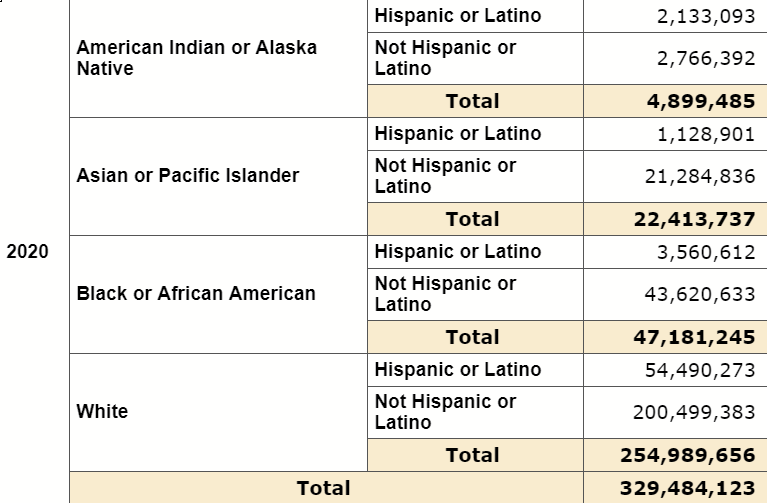

In [101]:
Top_ethinicity_vaccination = df_vacc2[df_vacc2['Demographic_category'].isin(['Race_eth_NHBlack', 'Race_eth_NHWhite','Race_eth_NHAsian','Race_eth_Hispanic'])]

In [102]:
Top_ethinicity_vaccination

,Demographic_category,Administered_Dose1,Series_Complete_Yes,Booster_Doses_Yes
0,Race_eth_NHBlack,19654556,17188655,7355683
2,Race_eth_NHWhite,105162212,95455220,54513075
13,Race_eth_NHAsian,12769182,11540324,7376992
16,Race_eth_Hispanic,39717321,33836619,13386959


In [103]:
df11 = {'US National Total for Ehnicity':[43620633,200499383,21284836,61312879,2766392 ]}
df111 = pd.DataFrame(df11)


In [108]:
df111 = df111.astype(int)

In [109]:
US_National_Total_for_Ehnicity = df111

In [110]:
US_National_Total_for_Ehnicity

,US National Total for Ehnicity
0,17188655
1,95455220
2,11540324
3,33836619


In [111]:
Top_ethinicity_vaccination = Top_ethinicity_vaccination.join(US_National_Total_for_Ehnicity)

ValueError: ignored

In [107]:
Top_ethinicity_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Demographic_category            4 non-null      object 
 1   Administered_Dose1              4 non-null      int64  
 2   Series_Complete_Yes             4 non-null      int64  
 3   Booster_Doses_Yes               4 non-null      int64  
 4   US National Total for Ehnicity  2 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 364.0+ bytes
